변동성 돌파 전략 : 전날의 변동폭에서 다음 날에도 영향을 주는 경우에 매수

In [1]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 3.0 MB/s eta 0:00:00


In [24]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

df = fdr.DataReader('005930', '2002')
df = df[df['Volume'] > 0] # 거래가 실제로 이루어진 날
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2002-01-02,5660,6160,5620,6160,1142079,0.103943
2002-01-03,6100,6190,6020,6040,885636,-0.019481
2002-01-04,6380,6410,6290,6380,1009482,0.056291
2002-01-07,6260,6430,6170,6360,1029132,-0.003135
2002-01-08,6390,6390,6190,6230,760142,-0.020440


In [25]:
df['Range'] = df['High'] - df['Low']
df['Before_Date_Range'] = df['Range'].shift(1)
df.dropna(inplace = True)

In [26]:
df['Target_Price'] = df['Open'] + df['Before_Date_Range'] * 0.5
df.head()

,Open,High,Low,Close,Volume,Change,Range,Before_Date_Range,Target_Price
Date,,,,,,,,,
2002-01-03,6100,6190,6020,6040,885636,-0.019481,170,540.0,6370.0
2002-01-04,6380,6410,6290,6380,1009482,0.056291,120,170.0,6465.0
2002-01-07,6260,6430,6170,6360,1029132,-0.003135,260,120.0,6320.0
2002-01-08,6390,6390,6190,6230,760142,-0.020440,200,260.0,6520.0
2002-01-09,6210,6450,6190,6450,902401,0.035313,260,200.0,6310.0


In [27]:
df['Buy_Signal'] = np.where(df['High'] >= df['Target_Price'], 1, 0) # Target Price가 High보다 낮을 때 구매할 기회가 생겼음
df.head()

,Open,High,Low,Close,Volume,Change,Range,Before_Date_Range,Target_Price,Buy_Signal
Date,,,,,,,,,,
2002-01-03,6100,6190,6020,6040,885636,-0.019481,170,540.0,6370.0,0
2002-01-04,6380,6410,6290,6380,1009482,0.056291,120,170.0,6465.0,0
2002-01-07,6260,6430,6170,6360,1029132,-0.003135,260,120.0,6320.0,1
2002-01-08,6390,6390,6190,6230,760142,-0.020440,200,260.0,6520.0,0
2002-01-09,6210,6450,6190,6450,902401,0.035313,260,200.0,6310.0,1


In [28]:
df_buy = df[df['Buy_Signal'] == 1]
df_buy['return'] = df_buy['Close'] - df_buy['Target_Price']
df_buy['rate_of_return'] = (df_buy['Close'] - df_buy['Target_Price'] ) / df_buy['Target_Price']
df_buy.head()

<ipython-input-28-75eb798182cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buy['return'] = df_buy['Close'] - df_buy['Target_Price']
<ipython-input-28-75eb798182cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buy['rate_of_return'] = (df_buy['Close'] - df_buy['Target_Price'] ) / df_buy['Target_Price']


,Open,High,Low,Close,Volume,Change,Range,Before_Date_Range,Target_Price,Buy_Signal,return,rate_of_return
Date,,,,,,,,,,,,
2002-01-07,6260,6430,6170,6360,1029132,-0.003135,260,120.0,6320.0,1,40.0,0.006329
2002-01-09,6210,6450,6190,6450,902401,0.035313,260,200.0,6310.0,1,140.0,0.022187
2002-01-14,6050,6599,6040,6600,978026,0.078431,559,310.0,6205.0,1,395.0,0.063658
2002-01-17,5900,6060,5860,6000,1112140,-0.004975,200,220.0,6010.0,1,-10.0,-0.001664
2002-01-22,5840,6050,5840,6000,657912,0.030928,210,120.0,5900.0,1,100.0,0.016949


In [29]:
df_buy.loc[:, 'cumul_ror'] =  (df_buy.loc[:, 'rate_of_return'] + 1).cumprod() - 1
df_buy.tail()

<ipython-input-29-5b15e73f2536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buy.loc[:, 'cumul_ror'] =  (df_buy.loc[:, 'rate_of_return'] + 1).cumprod() - 1


,Open,High,Low,Close,Volume,Change,Range,Before_Date_Range,Target_Price,Buy_Signal,return,rate_of_return,cumul_ror
Date,,,,,,,,,,,,,
2024-11-07,56900,58100,56800,57500,17043102,0.003490,1300,1700.0,57750.0,1,-250.0,-0.004329,7.385718
2024-11-13,52000,53000,50500,50600,52527995,-0.045283,2500,1600.0,52800.0,1,-2200.0,-0.041667,7.036313
2024-11-14,50200,51800,49900,49900,48510715,-0.013834,1900,2500.0,51450.0,1,-1550.0,-0.030126,6.794209
2024-11-15,50300,54200,50300,53500,46774485,0.072144,3900,1900.0,51250.0,1,2250.0,0.043902,7.136393
2024-11-19,56500,57500,55900,56300,31539632,-0.007055,1600,1600.0,57300.0,1,-1000.0,-0.017452,6.994397


<Axes: xlabel='Date'>

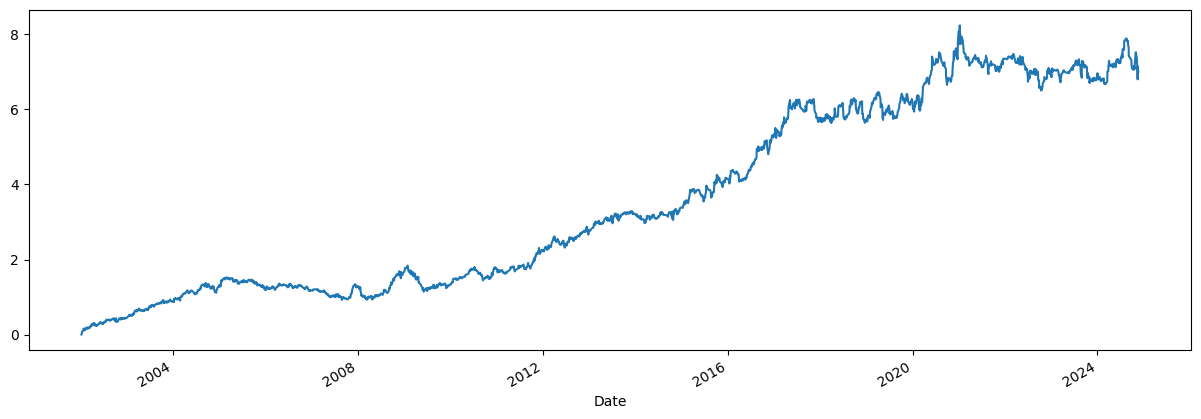

In [30]:
df_buy['cumul_ror'].plot(figsize = (15,5))

In [31]:
변동성돌파_누적수익률 = df_buy['cumul_ror'].iloc[-1]
변동성돌파_투자기간 = len(df) / 252
변동성돌파_CAGR = ((변동성돌파_누적수익률 + 1) ** (1/변동성돌파_투자기간)) -1
print(변동성돌파_CAGR)

0.09714957776713318


### 단순 보유와 변동성 돌파 전략 비교

In [35]:
df['cumul_ror'] = (df['Change'] + 1).cumprod() - 1
df.tail()

,Open,High,Low,Close,Volume,Change,Range,Before_Date_Range,Target_Price,Buy_Signal,cumul_ror
Date,,,,,,,,,,,
2024-11-15,50300,54200,50300,53500,46774485,0.072144,3900,1900.0,51250.0,1,7.685065
2024-11-18,57000,57500,55900,56700,48095234,0.059813,1600,3900.0,58950.0,0,8.204545
2024-11-19,56500,57500,55900,56300,31539632,-0.007055,1600,1600.0,57300.0,1,8.139610
2024-11-20,56100,56500,54800,55300,20864667,-0.017762,1700,1600.0,56900.0,0,7.977273
2024-11-21,54900,55700,54700,55500,7739317,0.003617,1000,1700.0,55750.0,0,8.009740


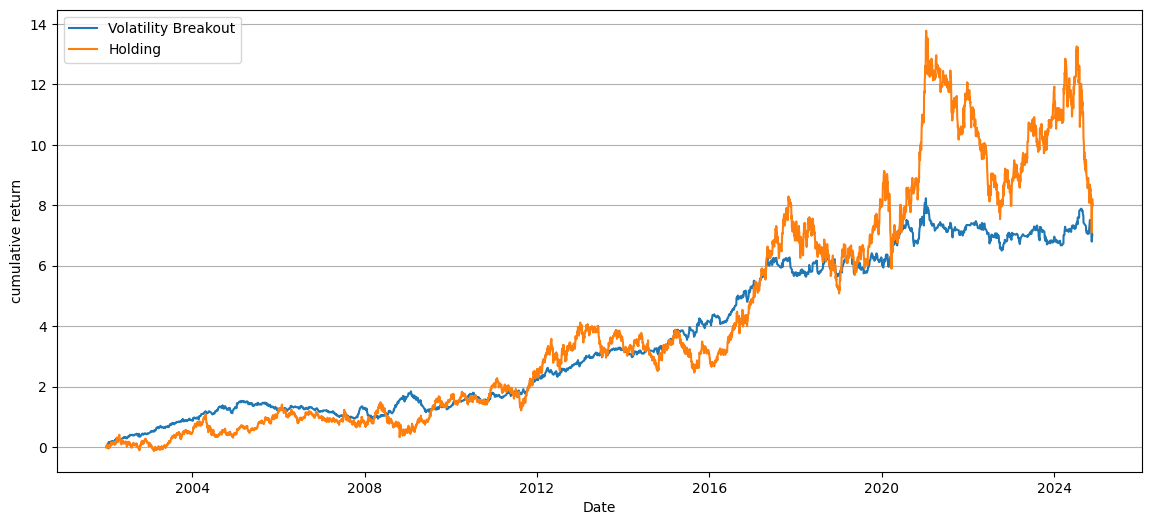

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_buy['cumul_ror'], label="Volatility Breakout") # 변동성 돌파
ax.plot(df['cumul_ror'], label="Holding") #

plt.xlabel('Date')
plt.ylabel('cumulative return')
plt.grid(True, axis='y')
plt.legend()
plt.show()